array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

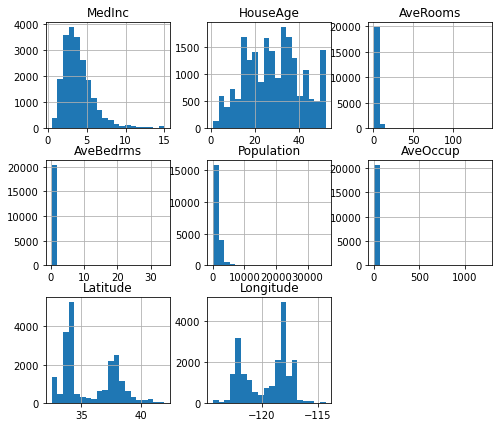

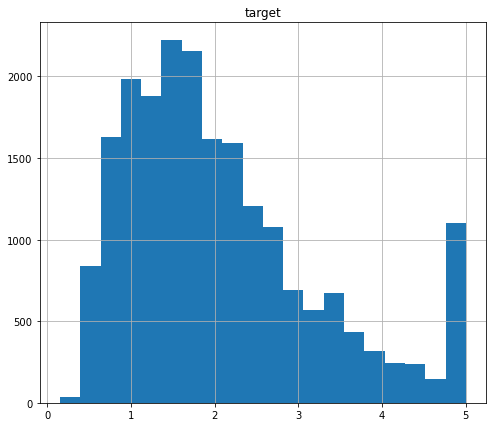

In [162]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target)
y = y.rename(columns={0: "target"})

X.hist(bins=20, figsize=(8,7))
y.hist(bins=20, figsize=(8,7))

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1016)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_train_hat = lr.predict(X_train_sc)
y_test_hat = lr.predict(X_test_sc)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  0.718343183373882
RMSE(test) :  0.7446113199726717


In [261]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_california_housing(return_X_y = True)

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

bins = np.linspace(-1423, 34257, 10)
which_bin = np.digitize(X_pca, bins=bins)

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned=encoder.transform(which_bin)

X_train_binned, X_test_binned, y_train, y_test = train_test_split(X_binned,y,random_state=1016)

lr = LinearRegression()
lr.fit(X_train_binned,y_train)
y_train_hat = lr.predict(X_train_binned)
y_test_hat = lr.predict(X_test_binned)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  1.145531604832062
RMSE(test) :  1.1784368648034047


In [233]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
poly.get_feature_names()
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_sc = scaler.transform(X_train_poly)
X_test_poly_sc = scaler.transform(X_test_poly)

lr = LinearRegression()
lr.fit(X_train_poly_sc,y_train)
y_train_hat = lr.predict(X_train_poly_sc)
y_test_hat = lr.predict(X_test_poly_sc)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  0.6486018910649863
RMSE(test) :  0.6744074161307838


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>]],
      dtype=object)

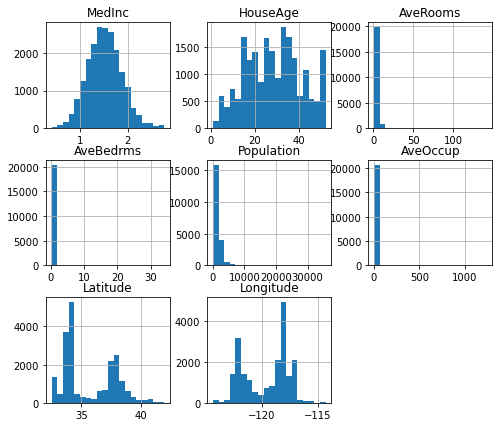

In [181]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target)
y = y.rename(columns={0: "target"})

for idx in range(len(X['MedInc'])):
    X['MedInc'][idx] = np.log(X['MedInc'][idx] + 1)

X.hist(bins=20, figsize=(8,7))

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1016)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_train_hat = lr.predict(X_train_sc)
y_test_hat = lr.predict(X_test_sc)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  0.7460078060487457
RMSE(test) :  0.7642238162233127


In [206]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression

X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1016)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

select = SelectKBest(f_regression, k = 6)
select.fit(X_train_sc, y_train)
X_train_selected = select.transform(X_train_sc)
X_test_selected = select.transform(X_test_sc)

lr = LinearRegression()
lr.fit(X_train_selected,y_train)
y_train_hat = lr.predict(X_train_selected)
y_test_hat = lr.predict(X_test_selected)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  0.7194816893746349
RMSE(test) :  0.7455460547716126


In [222]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import RFE

X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1016)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

estimator = LinearRegression()
select = RFE(estimator, n_features_to_select=6, step=1)
select.fit(X_train_sc, y_train)

X_train_selected = select.transform(X_train_sc)
X_test_selected = select.transform(X_test_sc)

lr = LinearRegression()
lr.fit(X_train_selected,y_train)
y_train_hat = lr.predict(X_train_selected)
y_test_hat = lr.predict(X_test_selected)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  0.7194816893746349
RMSE(test) :  0.7455460547716126


In [224]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectFromModel

X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1016)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

fmodel = LinearRegression()
select = SelectFromModel(fmodel, threshold="mean")
select.fit(X_train_sc, y_train)

X_train_selected = select.transform(X_train_sc)
X_test_selected = select.transform(X_test_sc)

lr = LinearRegression()
lr.fit(X_train_selected,y_train)
y_train_hat = lr.predict(X_train_selected)
y_test_hat = lr.predict(X_test_selected)
print("RMSE(train) : ", mean_squared_error(y_train,y_train_hat)**0.5)
print("RMSE(test) : ", mean_squared_error(y_test,y_test_hat)**0.5)

RMSE(train) :  0.7395914931507552
RMSE(test) :  0.7573975167442405
